In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# 1. Implement kmean algorithm by Numpy.

In [2]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    

# 2. Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

4 clusters


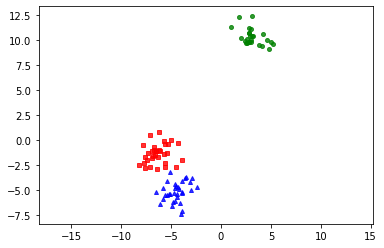

6 clusters


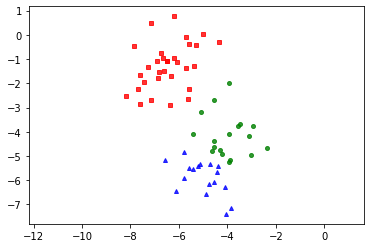

8 clusters


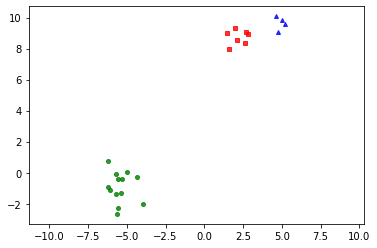

In [3]:
from sklearn import datasets

X_1, y = datasets.make_blobs()
#X_1 = X_1['data'][:,:2]

#y = iris.target
for K in [4, 6, 8]:
    print(f'{K} clusters')
    (centers, labels, it) = kmeans(X_1, K)
    kmeans_display(X_1, labels[-1])

# dataset 2

4 clusters


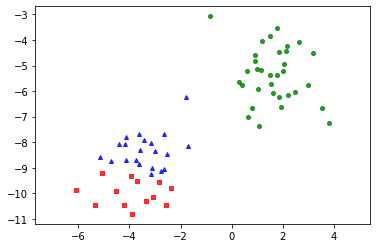

6 clusters


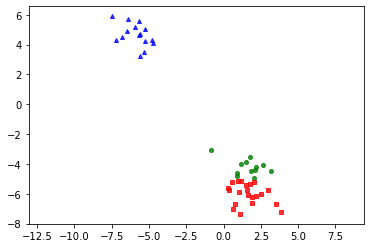

8 clusters


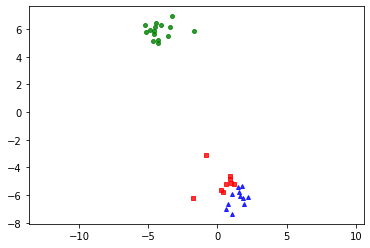

In [4]:
from sklearn import datasets

X_2, y = datasets.make_blobs()
#X_2 = X_2['data'][:,:2]

#y = iris.target
for K in [4, 6, 8]:
    print(f'{K} clusters')
    (centers, labels, it) = kmeans(X_2, K)
    kmeans_display(X_2, labels[-1])

# dataset 3

4 clusters


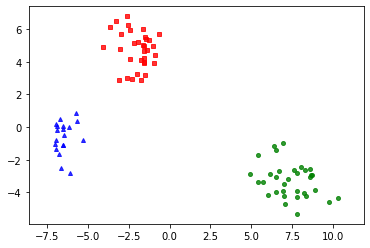

6 clusters


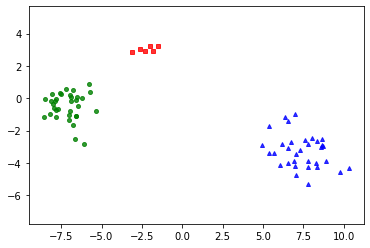

8 clusters


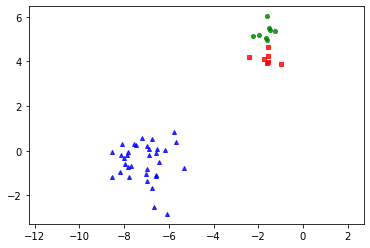

In [16]:
from sklearn import datasets

X_3, y = datasets.make_blobs()
#X_3 = X_3['data'][:,:2]

#y = iris.target
for K in [4, 6, 8]:
    print(f'{K} clusters')
    (centers, labels, it) = kmeans(X_3, K)
    kmeans_display(X_3, labels[-1])

# 3. Read and understand how to choose k, draw the elbow for the above dataset.

In [11]:
from sklearn.cluster import KMeans
def plot_elbow(datasets):
    Sum_of_squared_distances = []
    K = range(1,10)
    for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(datasets)
        Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(K,Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()

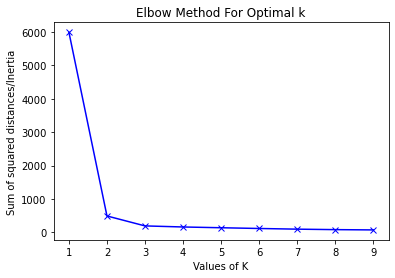

In [13]:
plot_elbow(X_1)

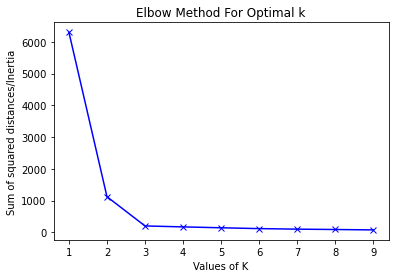

In [14]:
plot_elbow(X_2)

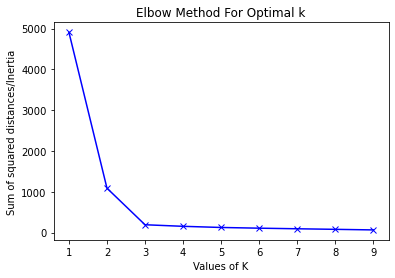

In [17]:
plot_elbow(X_3)

# 4.Read the limitation of k-mean, find at least 3 example k-mean doesn't work

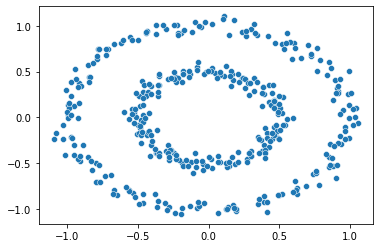

In [19]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=0)
sns.scatterplot(x=[x[0] for x in X],
                y=[x[1] for x in X],
                palette="deep",
                legend=None)
plt.show()

Centers found by our algorithm:
[[ 1.97306689  0.84915787]
 [-1.26551713  7.7693112 ]
 [-0.32224425  3.6089909 ]]


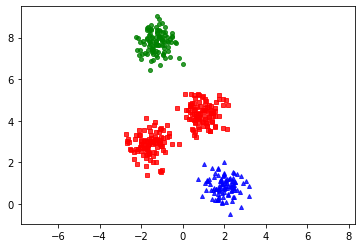

In [20]:
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
(centers, labels, it) = kmeans(X, K=3)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])